In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
bureau = pd.read_csv('../input/bureau.csv')
bb = pd.read_csv('../input/bureau_balance.csv')

<font size=3> STATUS: 

Status of Credit Bureau loan during the month (active, closed, DPD0-30, ? )

C means closed

X means status unknown,

0 means no DPD, 

1 means maximal did during month between 1-30, 

2 means DPD 31-60,

? 5 means DPD 120+ or sold or written off

In [5]:
bb.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [18]:
bb.isnull().sum()

SK_ID_BUREAU      0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

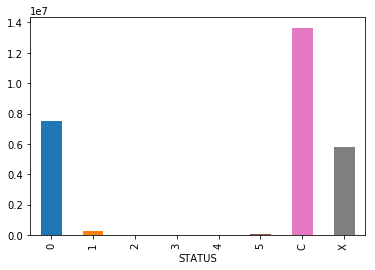

In [13]:
bb.groupby('STATUS').size().plot(kind='bar')

<font size=3> merely a tiny part of the bureau balance records are overdue

<font size=3> take a glimpse on some records

In [17]:
bb[bb['SK_ID_BUREAU'] == 5001709]

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
26079753,5001709,0,C
26079754,5001709,-1,C
26079755,5001709,-2,C
26079756,5001709,-3,C
26079757,5001709,-4,C
26079758,5001709,-5,C
26079759,5001709,-6,C
26079760,5001709,-7,C
26079761,5001709,-8,C
26079762,5001709,-9,C


In [15]:
bb[bb['SK_ID_BUREAU'] == 5715448]

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C
5,5715448,-5,C
6,5715448,-6,C
7,5715448,-7,C
8,5715448,-8,C
9,5715448,-9,0


<font size=3> apprently this credit went go through 3 types of status.

In [19]:
def one_hot_encoding(df, nan_as_category):
    original_columns = list(df.columns)
    categorical_columns = [
        col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns=categorical_columns,
                        dummy_na=nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

In [34]:
bb_one_year = bb[bb['MONTHS_BALANCE'] >= -12]
bb_half_year = bb[bb['MONTHS_BALANCE'] >= -6]

def see_change(x):
    return x.nunique() > 1

bb_agg = bb.groupby('SK_ID_BUREAU')[['STATUS']].\
            agg(see_change).reset_index().rename(columns={'STATUS': 'STATUS_CHANGE'})
bb_one_year_agg = bb_one_year.groupby('SK_ID_BUREAU')[['STATUS']].\
            agg(see_change).reset_index().rename(columns={'STATUS': 'STATUS_CHANGE'})
bb_half_year_agg = bb_half_year.groupby('SK_ID_BUREAU')[['STATUS']].\
            agg(see_change).reset_index().rename(columns={'STATUS': 'STATUS_CHANGE'})

In [ ]:
for df in [bb, bb_one_year, ]
bb, bb_cat = one_hot_encoding(bb, nan_as_category)


bb_aggregations = {'MONTHS_BALANCE': ['min', 'max', 'size']}

status_aggregations = {}
for col in bb_cat:
    status_aggregations[col] = ['mean', 'sum']




bb_agg = bb.groupby('SK_ID_BUREAU').agg(bb_aggregations)
bb_agg.columns = pd.Index([e[0] + "_" + e[1].upper()
                           for e in bb_agg.columns.tolist()])
bureau = bureau.join(bb_agg, how='left', on='SK_ID_BUREAU')

In [ ]:
bb.groupby('SK_ID_BUREAU').size()

In [4]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [15]:
def one_hot_encoder(df, nan_as_category=True):
    original_columns = list(df.columns)
    categorical_columns = [
        col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns=categorical_columns,
                        dummy_na=nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

In [17]:
bb, bb_cat = one_hot_encoder(bureau_balance, True)
bureau, bureau_cat = one_hot_encoder(bureau, True)

In [28]:
bb_aggregations = {'MONTHS_BALANCE': ['min', 'max', 'size']}
for col in bb_cat:
    bb_aggregations[col] = ['mean', 'sum']
bb_agg = bb.groupby('SK_ID_BUREAU').agg(bb_aggregations)
bb_agg.columns = pd.Index([e[0] + "_" + e[1].upper() for e in bb_agg.columns.tolist()])

In [39]:
grp = bureau[['SK_ID_CURR', 'SK_ID_BUREAU', 'DAYS_CREDIT']].groupby(by = ['SK_ID_CURR'])
grp = grp.apply(lambda x: x.sort_values(['DAYS_CREDIT'], ascending = False)).reset_index(drop = True)

# Calculate Difference between the number of Days 
grp['DAYS_CREDIT1'] = grp['DAYS_CREDIT']*-1
grp['DAYS_DIFF'] = grp.groupby(by = ['SK_ID_CURR'])['DAYS_CREDIT1'].diff()

In [46]:
bb

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS_0,STATUS_1,STATUS_2,STATUS_3,STATUS_4,STATUS_5,STATUS_C,STATUS_X,STATUS_nan
0,5715448,0,0,0,0,0,0,0,1,0,0
1,5715448,-1,0,0,0,0,0,0,1,0,0
2,5715448,-2,0,0,0,0,0,0,1,0,0
3,5715448,-3,0,0,0,0,0,0,1,0,0
4,5715448,-4,0,0,0,0,0,0,1,0,0
5,5715448,-5,0,0,0,0,0,0,1,0,0
6,5715448,-6,0,0,0,0,0,0,1,0,0
7,5715448,-7,0,0,0,0,0,0,1,0,0
8,5715448,-8,0,0,0,0,0,0,1,0,0
9,5715448,-9,1,0,0,0,0,0,0,0,0


In [14]:
bureau[(bureau['CREDIT_ACTIVE'] == 'Active') & (bureau['DAYS_CREDIT_ENDDATE'] < 0)]

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
9,162297,5714471,Active,currency 1,-1146,0,-484.0,NaN,0.000,0,4500.000,0.000,0.000,0.000,Credit card,-690,NaN
10,162297,5714472,Active,currency 1,-1146,0,-180.0,NaN,0.000,0,337500.000,0.000,0.000,0.000,Credit card,-690,NaN
34,400486,5714506,Active,currency 1,-941,0,-17.0,NaN,NaN,0,40500.000,0.000,0.000,0.000,Credit card,-15,NaN
50,452585,5714525,Active,currency 1,-2538,0,-1427.0,NaN,0.000,0,45000.000,0.000,0.000,0.000,Credit card,-682,NaN
51,452585,5714527,Active,currency 1,-42,0,-26.0,NaN,NaN,0,45000.000,54000.000,0.000,0.000,Consumer credit,-31,NaN
65,242993,5714543,Active,currency 1,-2237,0,-1868.0,NaN,NaN,0,135000.000,NaN,NaN,0.000,Consumer credit,-1874,NaN
77,234931,5714557,Active,currency 1,-1272,0,-667.0,NaN,NaN,0,135000.000,17982.000,0.000,0.000,Consumer credit,-721,NaN
89,119939,5714570,Active,currency 1,-1390,0,-696.0,NaN,0.000,0,4500.000,-2.565,2.565,0.000,Credit card,-691,NaN
114,387080,5714603,Active,currency 1,-1239,0,-149.0,NaN,NaN,0,225000.000,185953.500,0.000,0.000,Credit card,-10,NaN
127,293201,5714624,Active,currency 1,-1425,0,-757.0,NaN,0.000,0,4500.000,0.000,4500.000,0.000,Credit card,-695,NaN
